In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [50]:
y = df.iloc[:, 1:2]
x = df.iloc[:, 0:1]

In [51]:
#splitting into a training set and a test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3, random_state=0)

In [52]:
#simple regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
#predicted result
y_pred = regressor.predict(x_test)

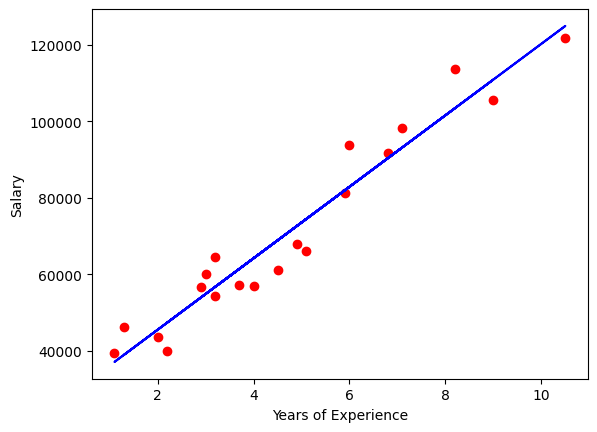

In [54]:
#training set viz
plt.scatter(x=x_train, y=y_train, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

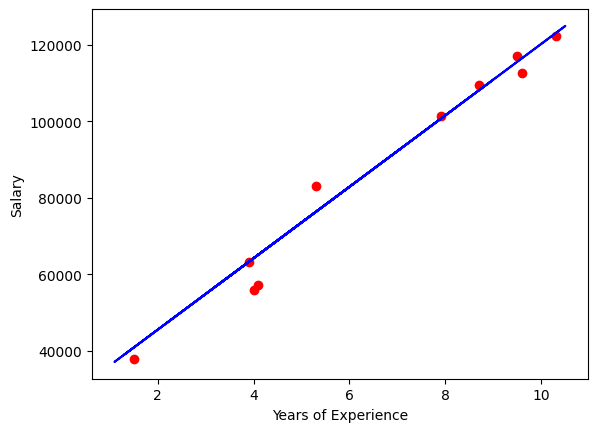

In [55]:
#test set viz
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="blue")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [59]:
df["Predicted_Salary"] = np.round(regressor.predict(x), 2)

In [61]:
df

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,37096.73
1,1.3,46205.0,38965.92
2,1.5,37731.0,40835.11
3,2.0,43525.0,45508.08
4,2.2,39891.0,47377.27
5,2.9,56642.0,53919.43
6,3.0,60150.0,54854.02
7,3.2,54445.0,56723.21
8,3.2,64445.0,56723.21
9,3.7,57189.0,61396.18
